<p align="center">
<img src="../docs/_static/SHINE.PNG" width="180" height=auto align="center"></a></p>

<h3 align="center">
    <p><b>Pathway Analysis SHINE!</b></p>
    </h3>

## Overview
Sampling Hierarchical Intrinsic *N*-ary Ensembles (SHINE) is a hierarchical clustering tool for pathway analysis. This can be particularly useful if you want to identical the dominant pathway(s) of your enhanced sampling simulations.

## Tutorial
The following tutorial will guide you through the process of determining the dominant pathways of a biomolecule using the SHINE algorithm. This tutorial assumes you have already ran some enhanced sampling simulations and have multiple files (one for each pathway in the ensemble) with the same format. 

In [ ]:
!pip install mdance


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: C:\Users\le.chen\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Step 1: Dependencies
First, we need to install the necessary dependencies. 

In [3]:
import glob
import re

import matplotlib.pyplot as plt
import numpy as np

from mdance.cluster.shine import Shine
from mdance.inputs.preprocess import gen_traj_numpy

/blue/rmirandaquintana/le.chen/comparisons/clustering/alignedClustering/.venv/lib64/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Step 2: Data Preparation
Next, we need to prepare the data for the SHINE algorithm. Make sure you have all the trajectory files in the same directory and that they are numbered sequentially. like `pathway_1.dcd`, `pathway_2.dcd`, `pathway_3.dcd`, etc.

In [ ]:
# EDIT THIS
input_top = 'adk4ake.psf'
atomSelection = 'name CA'
traj_paths = 'dims*.dcd'

In [18]:
def sort_key(filepath):
    match = re.search(r'(\d+)', filepath)
    if match:
        return int(match.group(1))
    else:
        return filepath

input_trajs = sorted(glob.glob(traj_paths), key=sort_key)
print(input_trajs)

for i, input_traj in enumerate(input_trajs):
    traj_numpy = gen_traj_numpy(input_top, input_traj, atomSelection)
    np.save(f'pathway_{i}.npy', traj_numpy)
    print(traj_numpy.shape)

['dims0001_fit-core.dcd', 'dims0002_fit-core.dcd', 'dims0003_fit-core.dcd', 'dims0004_fit-core.dcd', 'dims0005_fit-core.dcd']
Number of atoms in trajectory: 3341
Number of frames in trajectory: 102
Number of atoms in selection: 214
(102, 642)
Number of atoms in trajectory: 3341
Number of frames in trajectory: 92
Number of atoms in selection: 214
(92, 642)
Number of atoms in trajectory: 3341
Number of frames in trajectory: 95
Number of atoms in selection: 214


/blue/rmirandaquintana/le.chen/comparisons/clustering/alignedClustering/.venv/lib64/python3.11/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


(95, 642)
Number of atoms in trajectory: 3341
Number of frames in trajectory: 103
Number of atoms in selection: 214
(103, 642)
Number of atoms in trajectory: 3341
Number of frames in trajectory: 97
Number of atoms in selection: 214
(97, 642)


## Step 3: Running SHINE
Now we can run the SHINE algorithm. The following command will run the SHINE algorithm on the data in the current directory.

In [ ]:
# EDIT THIS
# System Parameters
file_pattern = 'data/*.npy'                                 # Follows data/trajectory_*.csv pattern where * is the trajectory number
metric = 'MSD'                                              # Metric to be used for clustering
N_atoms = 1                                                 # Number of atoms in the system

# SHINE Parameters
sampling = 'diversity'                                      # Sampling scheme {'diversity', 'quota'}
frac = 0.5                                                  # Fraction of frames to be sampled
merge_scheme = 'intra'                                      # Merge scheme {'intra', 'semi_sum', 'min'}

In [ ]:
frames_all = []

# Change this to read the data from different file patterns.
for file in glob.glob(file_pattern):
    traj = file.split('_')[-1].split('.')[0]
    frame = np.load(file)
    frames_all.append((traj, frame))

# Run SHINE
mod = Shine(frames_all, 'MSD', N_atoms=1 , t=2, criterion='maxclust', 
            link='ward', merge_scheme=merge_scheme, 
            sampling='diversity', frac=frac)
link, clusters = mod.run()

Step 4: Visualizing the Results
Finally, we can visualize the results of the SHINE algorithm. The SHINE algorithm will output a dendrogram that shows the hierarchical clustering of the pathways. You can use this dendrogram to identify the dominant pathways in the ensemble.

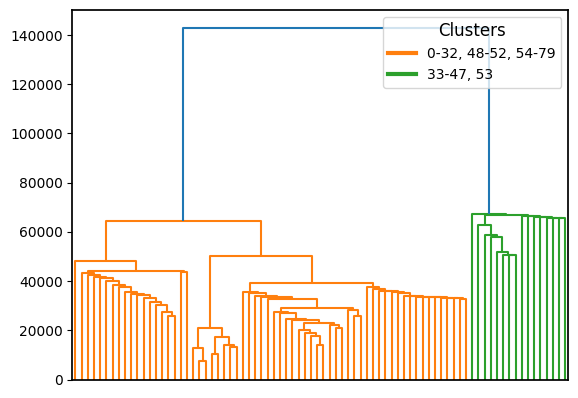

In [ ]:
ax = mod.plot()
plt.show()